In [47]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Problem 1

In [48]:
# Code created by Rishabh Sinha

def pmt_semiannual(L, t, i):
    a = (1 - (1 + ((1 + i)**(1/2) - 1))**(-2 * t)) / ((1 + i)**(1/2) - 1)
    return L / a

print(pmt_semiannual(100000, 12, 0.1025))


7247.090075268704


The semi annual interest is (1.1025)^(1/2)−1 = 0.05 and the annuity factor is (1−(1+0.05)^(−2 * 12))/0.05 = 13.7986. Therefore the semi-annual loan payment is 100000 / 13.7986 = 7247.1120 which is close due to rounding error. Hence verified by hand calculation.
 
​
 


# Problem 2

In [49]:
# Code created by Rishabh Sinha

df = pd.DataFrame({
    'Name_Employee': ['Rishi', 'Alejandro', 'Ekaterina', 'Sanjana', 'Jessica', 
                'Kim', 'Tyler', 'Maya', 'James', 'Alex'],
    'Amt_Annuity': [24000, 32500, 47500, 35000, 46500, 
                       23500, 38000, 55500, 34500, 27000],
    'Yr_Start': [2026, 2025, 2025, 2026, 2028, 
                  2025, 2026, 2027, 2025, 2028],
    'Yr_End': [2030, 2034, 2028, 2030, 2035, 
                2029, 2030, 2032, 2029, 2031]
})
print(df)

  Name_Employee  Amt_Annuity  Yr_Start  Yr_End
0         Rishi        24000      2026    2030
1     Alejandro        32500      2025    2034
2     Ekaterina        47500      2025    2028
3       Sanjana        35000      2026    2030
4       Jessica        46500      2028    2035
5           Kim        23500      2025    2029
6         Tyler        38000      2026    2030
7          Maya        55500      2027    2032
8         James        34500      2025    2029
9          Alex        27000      2028    2031


In [50]:
d, i, v = 0.0925, 0.0925 / (1 - 0.0925), 1 / (1 + (0.0925 / (1 - 0.0925)))

def annuity_pv(amt, start_yr, end_yr, req_yr):
    if req_yr >= end_yr or max(req_yr + 1, start_yr) > end_yr: return 0.0
    return amt * ((1 - v**(end_yr - max(req_yr + 1, 
                                        start_yr) + 1)) / i) * (v**(max(req_yr + 1, 
                                                                        start_yr) - (req_yr + 1)))

df[[f"PV_{yr}" for yr in range(2025, 2036)]] = df.apply(lambda row: [annuity_pv(row["Amt_Annuity"], 
                                                                              row["Yr_Start"], row["Yr_End"], 
                                                                              yr) for yr in range(2025, 2036)], 
                                                                              axis=1, 
                                                                              result_type='expand')
df = pd.concat([df, pd.DataFrame([{**{'Name_Employee': 'Total', 'Amt_Annuity': np.nan, 
                                      'Yr_Start': np.nan, 
                                      'Yr_End': np.nan}, 
                                      **{f"PV_{yr}": df[f"PV_{yr}"].sum() for yr in range(2025, 
                                                                                          2036)}}])], 
                                                                                          ignore_index=True)
print(df)

   Name_Employee  Amt_Annuity  Yr_Start  Yr_End       PV_2025       PV_2026  \
0          Rishi      24000.0    2026.0  2030.0  9.053246e+04  7.576028e+04   
1      Alejandro      32500.0    2025.0  2034.0  1.857422e+05  1.721746e+05   
2      Ekaterina      47500.0    2025.0  2028.0  1.177256e+05  8.222517e+04   
3        Sanjana      35000.0    2026.0  2030.0  1.320265e+05  1.104837e+05   
4        Jessica      46500.0    2028.0  2035.0  2.028766e+05  2.235555e+05   
5            Kim      23500.0    2025.0  2029.0  7.418194e+04  5.824319e+04   
6          Tyler      38000.0    2026.0  2030.0  1.433431e+05  1.199538e+05   
7           Maya      55500.0    2027.0  2032.0  2.181241e+05  2.403571e+05   
8          James      34500.0    2025.0  2029.0  1.089054e+05  8.550596e+04   
9           Alex      27000.0    2028.0  2031.0  7.019196e+04  7.734651e+04   
10         Total          NaN       NaN     NaN  1.343650e+06  1.245606e+06   

         PV_2027        PV_2028        PV_2029     

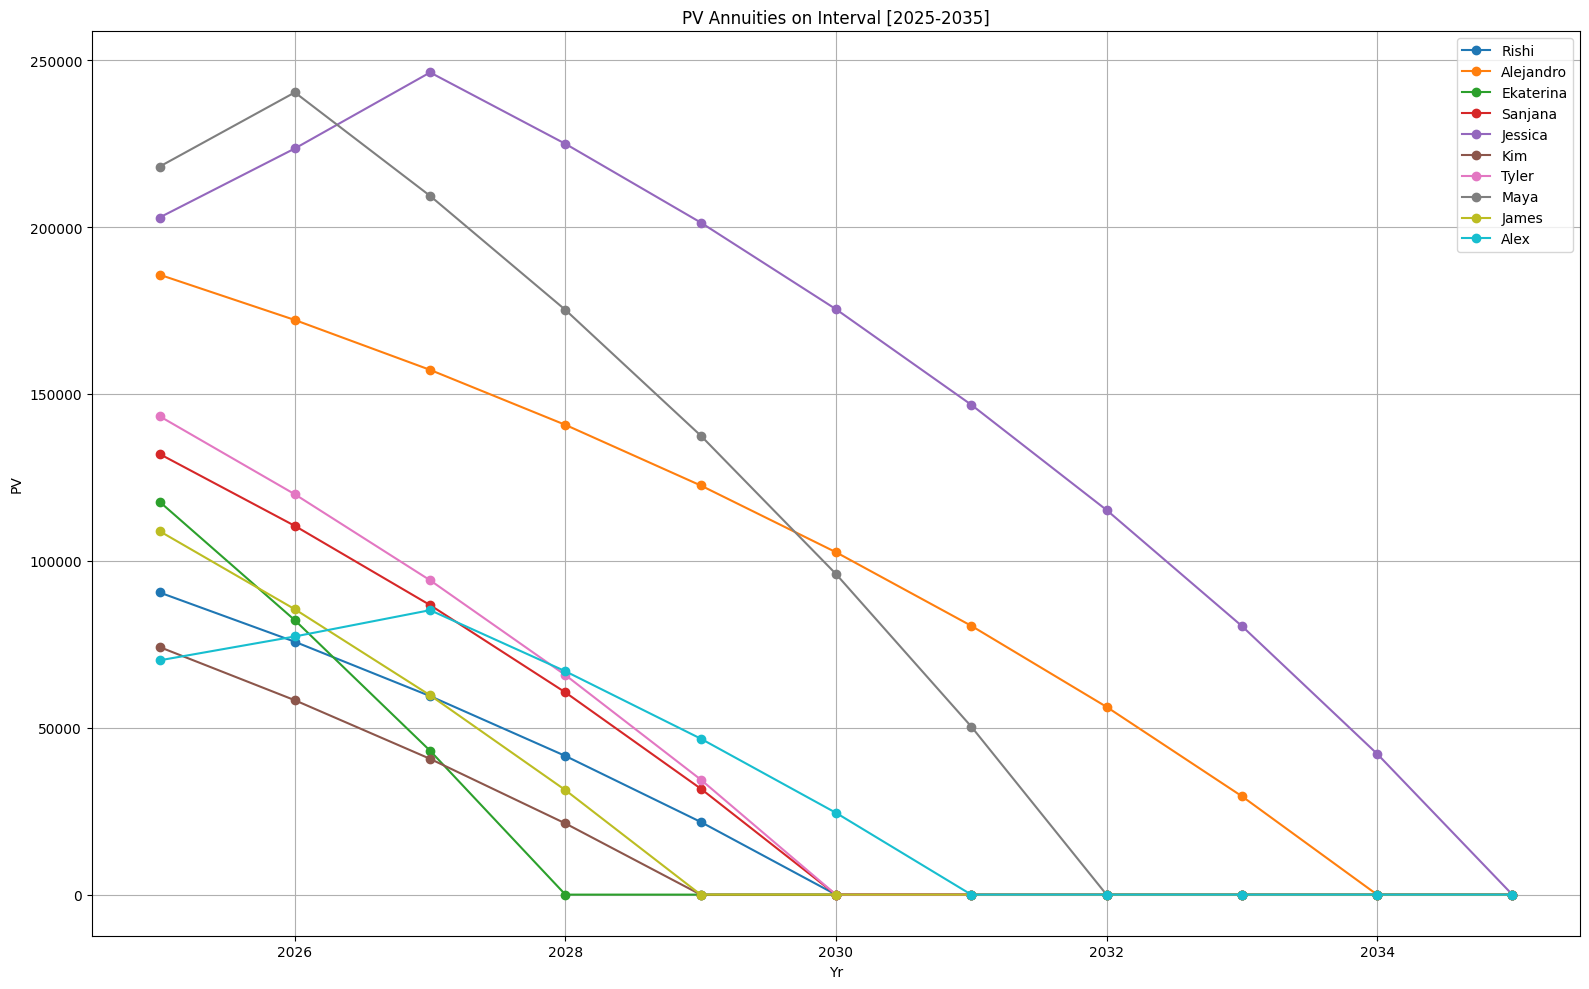

In [51]:
plt.figure(figsize=(16, 10))
for i, emp in enumerate(df['Name_Employee'][:-1]):
    plt.plot(range(2025, 2036), [df.iloc[i][f'PV_{y}'] for y in range(2025, 2036)], marker='o', label=emp)
plt.title('PV Annuities on Interval [2025-2035]')
plt.xlabel('Yr')
plt.ylabel('PV')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Employee with highest PV by year

In [52]:
{yr: df.iloc[df.iloc[:-1][f"PV_{yr}"].idxmax()]['Name_Employee'] for yr in range(2025, 2036)}

{2025: 'Maya',
 2026: 'Maya',
 2027: 'Jessica',
 2028: 'Jessica',
 2029: 'Jessica',
 2030: 'Jessica',
 2031: 'Jessica',
 2032: 'Jessica',
 2033: 'Jessica',
 2034: 'Jessica',
 2035: 'Rishi'}

### Year with highest total PV

In [53]:
sorted([(yr, df.iloc[-1][f"PV_{yr}"]) for yr in range(2025, 2036)], key=lambda x: x[1], reverse=True)[0]

(2025, 1343649.7393338713)